In [1]:
import os
import IPython.display as display
from bson import ObjectId
from gridfs import GridFS
from pymongo import MongoClient
from ajna_commons.flask.conf import DATABASE, MONGODB_URI
from ajna_commons.utils.images import get_imagens_recortadas

2019-03-13 11:36:47,251 ajna         INFO     Configuração de log efetuada


Fazendo log de erros e alertas no arquivo  /home/ivan/pybr/ajna/padma/ajna_commons/flask/error.log
Fazendo log de atividade no arquivo  /home/ivan/pybr/ajna/padma/ajna_commons/flask/access.log


In [2]:
TEMNCM = {'metadata.contentType': 'image/jpeg',
          'metadata.carga.ncm': {'$exists': True}}
def get_cursor_filtrado(db, filtro, limit=None):
    cursor = db['fs.files'].find(filtro)
    if limit:
        cursor.limit(limit)
    return cursor
db = MongoClient(host=MONGODB_URI)[DATABASE]
cursor = get_cursor_filtrado(db, filtro=TEMNCM, limit=10)

In [3]:
grid_fs = next(cursor)
fs = GridFS(db)
_id = ObjectId(grid_fs['_id'])
if fs.exists(_id):
    grid_out = fs.get(_id)
    image = grid_out.read()
    
imgs = get_imagens_recortadas(db, _id)
print(imgs)

[<PIL.Image.Image image mode=RGB size=441x192 at 0x7FA7D86E0F28>]


In [4]:
%load_ext autoreload
%autoreload 2
import image_enhance as ime
from io import BytesIO
from PIL import Image, ImageEnhance, ImageOps


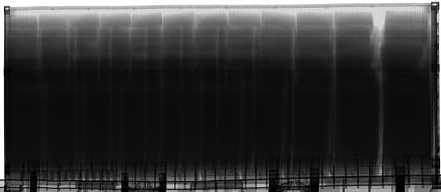

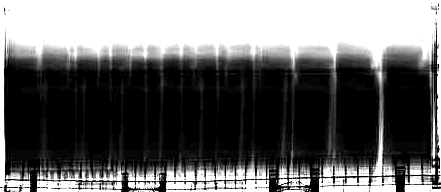

In [5]:
pil_image = imgs[0]
display.display(pil_image)
enhanced = ImageOps.autocontrast(pil_image, cutoff=30)
display.display(enhanced)

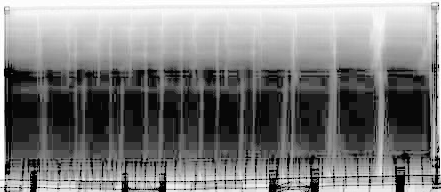

In [6]:
import numpy as np
eq_image = ImageOps.equalize(pil_image)
display.display(eq_image)

In [7]:
enhanced = np.asarray(pil_image)
enhanced.shape
enhanced[:, :, 0]

array([[254, 254, 254, ..., 251, 255, 244],
       [254, 254, 254, ..., 201, 255, 255],
       [254, 254, 254, ...,  69, 214, 254],
       ...,
       [157, 151, 159, ..., 134, 105, 110],
       [150, 150, 164, ..., 141, 133, 135],
       [155, 159, 171, ..., 137, 136, 144]], dtype=uint8)

In [8]:
alpha = 1.5
gamma = 1.4
enhanced_gray = np.array(enhanced[:, :, 0] * 3. * alpha **gamma, dtype=np.float32)
enhanced_gray

array([[1344.2583 , 1344.2583 , 1344.2583 , ..., 1328.3812 , 1349.5507 ,
        1291.3347 ],
       [1344.2583 , 1344.2583 , 1344.2583 , ..., 1063.7634 , 1349.5507 ,
        1349.5507 ],
       [1344.2583 , 1344.2583 , 1344.2583 , ...,  365.17255, 1132.5641 ,
        1344.2583 ],
       ...,
       [ 830.89984,  799.1457 ,  841.48456, ...,  709.17566,  555.6973 ,
         582.1591 ],
       [ 793.85333,  793.85333,  867.9463 , ...,  746.22217,  703.8833 ,
         714.468  ],
       [ 820.3151 ,  841.48456,  904.9928 , ...,  725.05273,  719.7604 ,
         762.0992 ]], dtype=float32)

In [9]:
enhanced_R = enhanced_gray.copy()
enhanced_R[enhanced_R > 254] = 254
#enhanced_R = -enhanced_R + 254

In [10]:
enhanced_G = (enhanced_gray - 254)
enhanced_G[enhanced_G > 254] = 254
enhanced_G[enhanced_G < 0] = 0
#enhanced_G = (-enhanced_G + 254)

In [11]:
enhanced_B = (enhanced_gray - 509) 
enhanced_B[enhanced_B < 0] = 0
enhanced_B[enhanced_B > 254] = 254
#enhanced_B = (-enhanced_B + 254)

In [12]:
enhanced_RGB = np.dstack((enhanced_R, enhanced_G, enhanced_B)).astype(np.uint8)
enhanced_RGB.shape

(192, 441, 3)

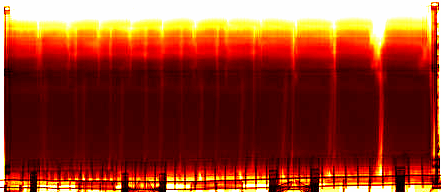

In [13]:
enhanced_color = Image.fromarray(enhanced_RGB)
display.display(enhanced_color)

In [14]:
enhanced_R

array([[254., 254., 254., ..., 254., 254., 254.],
       [254., 254., 254., ..., 254., 254., 254.],
       [254., 254., 254., ..., 254., 254., 254.],
       ...,
       [254., 254., 254., ..., 254., 254., 254.],
       [254., 254., 254., ..., 254., 254., 254.],
       [254., 254., 254., ..., 254., 254., 254.]], dtype=float32)

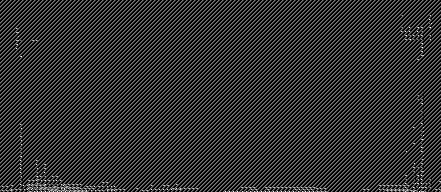

In [15]:
enhanced_pil = Image.fromarray(enhanced_R, mode='L')
display.display(enhanced_pil)

In [16]:
enhanced_G

array([[254.     , 254.     , 254.     , ..., 254.     , 254.     ,
        254.     ],
       [254.     , 254.     , 254.     , ..., 254.     , 254.     ,
        254.     ],
       [254.     , 254.     , 254.     , ..., 111.17255, 254.     ,
        254.     ],
       ...,
       [254.     , 254.     , 254.     , ..., 254.     , 254.     ,
        254.     ],
       [254.     , 254.     , 254.     , ..., 254.     , 254.     ,
        254.     ],
       [254.     , 254.     , 254.     , ..., 254.     , 254.     ,
        254.     ]], dtype=float32)

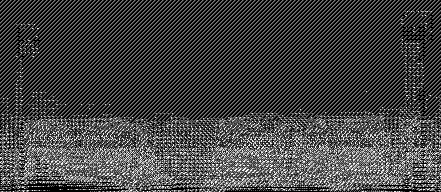

In [17]:
enhanced_pil = Image.fromarray(enhanced_G, mode='L')
display.display(enhanced_pil)

In [18]:
enhanced_B

array([[254.      , 254.      , 254.      , ..., 254.      , 254.      ,
        254.      ],
       [254.      , 254.      , 254.      , ..., 254.      , 254.      ,
        254.      ],
       [254.      , 254.      , 254.      , ...,   0.      , 254.      ,
        254.      ],
       ...,
       [254.      , 254.      , 254.      , ..., 200.17566 ,  46.697327,
         73.15912 ],
       [254.      , 254.      , 254.      , ..., 237.22217 , 194.8833  ,
        205.46802 ],
       [254.      , 254.      , 254.      , ..., 216.05273 , 210.76038 ,
        253.09918 ]], dtype=float32)

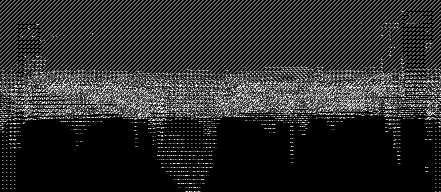

In [19]:
enhanced_pil = Image.fromarray(enhanced_B, mode='L')
display.display(enhanced_pil)

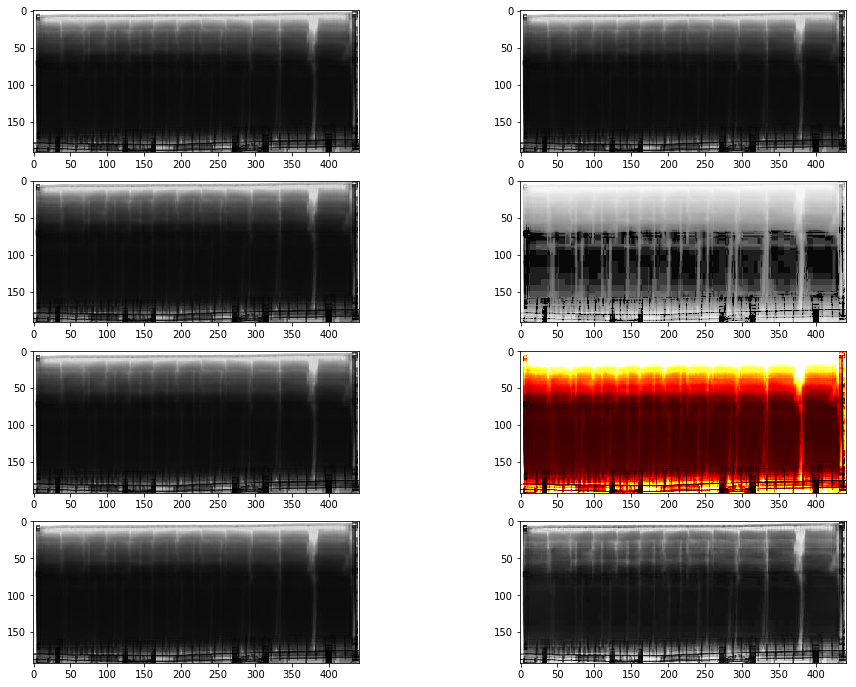

In [20]:
import cv2

opencvImage = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

# cv2.imshow("Original image",opencvImage)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

lab = cv2.cvtColor(opencvImage, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
# cv2.imshow('Increased contrast', img2)
from matplotlib import pyplot as plt
# Plot inline
%matplotlib inline
plt.figure(figsize=(16, 12))
i = 1
for ploted in [enhanced, eq_image, enhanced_color, img2]:
    plt.subplot(4, 2, i)
    plt.imshow(pil_image)
    plt.subplot(4, 2, i + 1)
    plt.imshow(ploted)
    i += 2


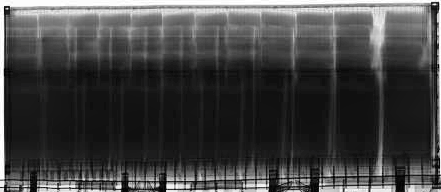

In [21]:
img2_pil = Image.fromarray(img2)
display.display(img2_pil)

In [22]:
from skimage import color
def colorize(image, hue, saturation=1):
    """ Add color of the given hue to an RGB image.

    By default, set the saturation to 1 so that the colors pop!
    """
    hsv = color.rgb2hsv(image)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)

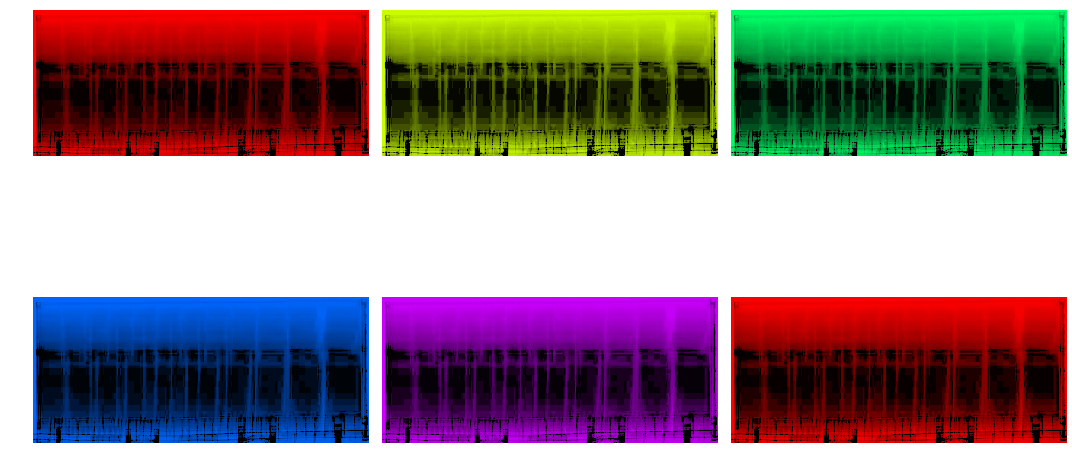

In [38]:
hue_rotations = np.linspace(0, 1, 6)

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15, 10))

for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(eq_image, hue, saturation=1)
    ax.imshow(tinted_image, vmin=0.1, vmax=0.9)
    ax.set_axis_off()
fig.tight_layout()


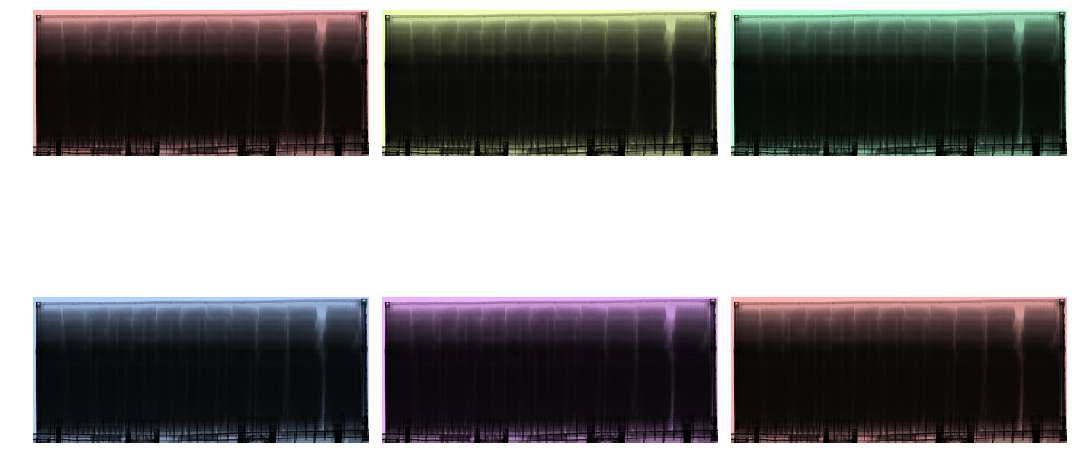

In [37]:
hue_rotations = np.linspace(0, 1, 6)

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15, 10))

for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(pil_image, hue, saturation=0.3)
    ax.imshow(tinted_image, vmin=0, vmax=1)
    ax.set_axis_off()
fig.tight_layout()
